# Step0: Problem Statement
This is a dataset about online news popularity from UCI.
https://archive.ics.uci.edu/ml/datasets/online+news+popularity
   
    
## Topic2
      Predict number of shares of the news proposed before it goes online
      (Regression, Adboost, RegressinTree )
      
## Key Methods
      1. Check the feature statistics
      2. Log outcome first and then transformed it back
      3. Separate the norm and crazy group. By cutoff of share ______.
      4. Normalize all numerical features
      5. Correlation Test: eliminate the highly correlated ones...
      

# Step1: Load the online news dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import statistics as st
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import time

cutoff = 10000

df = pd.read_csv("OnlineNewsPopularity.csv")
df = df.drop('url',1)
df['log_shares'] = np.log(df[' shares'])
#df.head()

# Step2: EDA & Data Preprocessing

In [2]:
# Check suspicious zero values
#df.describe()
df_inspect = df[df[' n_tokens_content']==0]
df = df[df[' n_tokens_content'] != 0]

In [3]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,360.385747,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,...,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398,7.469288
std,212.773031,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,...,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776,0.925483
min,8.000000,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,174.000000,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,...,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000,6.851185
50%,347.000000,10.000000,423.000000,0.542986,1.000000,0.693727,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000,7.244228
75%,547.000000,12.000000,729.000000,0.611111,1.000000,0.756944,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000,7.901007
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,13.645078


In [4]:
#check for outliers (too high or low), use [mean + 3 std] as a upper_threshold
#df.describe()
has_outlier = [' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',
              ' num_self_hrefs',' num_imgs',' num_videos',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',
               ' kw_max_avg',' kw_avg_max',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',
               ' self_reference_avg_sharess',' shares']
def set_threshold(df,col):
    temp = df[col].mean()+3*df[col].std()
    return temp

upper_threshold = list()
for i in range(len(has_outlier)):
    upper_threshold.append(set_threshold(df,has_outlier[i]))
    i = i+1

In [5]:
# eliminate outliers
for i in range(len(has_outlier)):
    df = df[df[has_outlier[i]] < upper_threshold[i]]

In [6]:
#df.iloc[:,50:60].describe()
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,33873.000000,33873.000000,33873.000000,33873.000000,3.387300e+04,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,...,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000
mean,361.513595,10.362029,502.802084,0.553510,1.000000e+00,0.701670,9.744634,2.959968,3.539456,0.681605,...,0.766628,-0.263191,-0.520235,-0.112798,0.275147,0.068400,0.342920,0.151149,2633.344079,7.418750
std,214.584116,2.108726,342.397718,0.097108,4.076420e-09,0.093049,7.557532,2.443370,5.381933,1.700183,...,0.212942,0.121870,0.276764,0.095532,0.320384,0.259782,0.188703,0.222077,3734.767801,0.856511
min,8.000000,3.000000,18.000000,0.181818,9.999999e-01,0.253112,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000,1.609438
25%,171.000000,9.000000,252.000000,0.484932,1.000000e+00,0.641469,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.327010,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,934.000000,6.839476
50%,350.000000,10.000000,402.000000,0.548330,1.000000e+00,0.699074,7.000000,2.000000,1.000000,0.000000,...,0.800000,-0.252273,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1400.000000,7.244228
75%,552.000000,12.000000,666.000000,0.613718,1.000000e+00,0.760606,13.000000,4.000000,3.000000,1.000000,...,1.000000,-0.188021,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2600.000000,7.863267
max,731.000000,23.000000,1966.000000,1.000000,1.000000e+00,1.000000,45.000000,15.000000,29.000000,13.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,38000.000000,10.545341


#check for binary variables: weekday, channel by visualization (already done)
'''
   # Visualize the feature of different day of week
columns_day = data.columns.values[list(data.columns).index(' weekday_is_monday'):list(data.columns).index(' weekday_is_sunday')+1]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values
    #figure: days
pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'gold',label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'g',label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Days of week", fontsize = 12)
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")

    # Visualize the feature of different channels
columns_channel = data.columns.values[list(data.columns).index( ' data_channel_is_lifestyle'):list(data.columns).index( ' data_channel_is_world')+1]
unpop_channel = unpop[columns_channel].sum().values
pop_channel = pop[columns_channel].sum().values
    #figure: channel 
pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over channels", fontsize = 16)
pl.bar(np.arange(len(columns_channel)), pop_channel, width = 0.3, align="center", color = 'gold',label = "popular")
pl.bar(np.arange(len(columns_channel)) - 0.3, unpop_channel, width = 0.3, align = "center", color = 'g',label = "unpopular")
pl.xticks(np.arange(len(columns_channel)), columns_channel)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Channel", fontsize = 12)
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("channel.pdf")

pl.close('all')

'''

In [7]:

from sklearn.preprocessing import MinMaxScaler
# normalization of numerical attribues
scaler = MinMaxScaler()
numerical = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
        ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
        ' num_self_hrefs', ' num_imgs', ' num_videos',
        ' average_token_length', ' num_keywords',' kw_min_min',
        ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
        ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
        ' self_reference_min_shares', ' self_reference_max_shares',
        ' self_reference_avg_sharess', 
        ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
        ' global_subjectivity', ' global_sentiment_polarity',
        ' global_rate_positive_words', ' global_rate_negative_words',
        ' rate_positive_words', ' rate_negative_words',
        ' avg_positive_polarity', ' min_positive_polarity',
        ' max_positive_polarity', ' avg_negative_polarity',
        ' min_negative_polarity', ' max_negative_polarity',
        ' title_subjectivity', ' title_sentiment_polarity',
        ' abs_title_subjectivity', ' abs_title_sentiment_polarity']
df[numerical] = scaler.fit_transform(df[numerical])


### Feature selection
#co-linear test
corr_matrix = df[numerical].corr().abs()
high_corr_var=list(np.where(corr_matrix>0.8))
high_corr_ex=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

'''
i=0
high_corr=[]
for x in range(len(high_corr_var[0])):
    if high_corr_var[0][x] != high_corr_var[1][x] and high_corr_var[0][x] < high_corr_var[1][x]:
        high_corr.append([list(df.columns)[high_corr_var[0][x]],list(df.columns)[high_corr_var[1][x]]])
        i=1+1

'''
high_corr_ex

In [8]:
df[' shares'].describe() #original

count    33873.000000
mean      2633.344079
std       3734.767801
min          5.000000
25%        934.000000
50%       1400.000000
75%       2600.000000
max      38000.000000
Name:  shares, dtype: float64

In [9]:
# Take only for this group:
df=df[df[' shares']<cutoff]
#df=df[df[' shares']>5000]
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,...,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000
mean,360.729111,0.368108,0.249554,0.453664,0.946581,0.600521,0.214357,0.197504,0.118886,0.051436,...,0.765275,0.737945,0.481090,0.887701,0.272636,0.533760,0.686494,0.149487,1982.901688,7.316055
std,215.173348,0.105413,0.175539,0.118440,0.049558,0.124136,0.165667,0.163003,0.182078,0.129412,...,0.213095,0.121347,0.276824,0.094773,0.318943,0.128826,0.377350,0.220447,1722.301647,0.720858
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.609438
25%,170.000000,0.300000,0.120637,0.370143,0.930705,0.520231,0.088889,0.066667,0.034483,0.000000,...,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000,919.000000,6.823286
50%,348.000000,0.350000,0.198152,0.447378,0.959726,0.597199,0.155556,0.133333,0.034483,0.000000,...,0.800000,0.749123,0.500000,0.900000,0.100000,0.500000,1.000000,0.000000,1300.000000,7.170120
75%,553.000000,0.450000,0.333676,0.526688,0.978852,0.679109,0.266667,0.266667,0.103448,0.076923,...,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.250000,2300.000000,7.740664
max,731.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9900.000000,9.200290


In [10]:
df[' shares'].describe() # after clean

count    32397.000000
mean      1982.901688
std       1722.301647
min          5.000000
25%        919.000000
50%       1300.000000
75%       2300.000000
max       9900.000000
Name:  shares, dtype: float64

# Step3: 

In [11]:
y_pre1 = df['log_shares']
#y_pre2 = df[' shares']

# method1
x_pre = df.drop(['log_shares',' shares',' weekday_is_saturday', ' weekday_is_sunday',
                 ' n_non_stop_words',' n_unique_tokens',
                            ' n_non_stop_words',' kw_avg_min',' kw_max_min',' kw_min_min',
                            ' self_reference_min_shares',' self_reference_avg_sharess',' rate_negative_words'],1)

"""
# method0
x_pre = df.drop([' shares','log_shares'],1)

# method2
yes = [' rate_positive_words',' LDA_00',' is_weekend',
       ' n_non_stop_unique_tokens',' data_channel_is_socmed',' rate_negative_words',' global_rate_positive_words',
        ' min_positive_polarity',' data_channel_is_tech',' global_rate_negative_words',' global_subjectivity',
       ' LDA_02',' data_channel_is_entertainment',' LDA_03',' LDA_01',' global_sentiment_polarity',' abs_title_subjectivity',' data_channel_is_bus',
       ' max_positive_polarity',' title_sentiment_polarity',' LDA_04',' title_subjectivity',' data_channel_is_lifestyle',' average_token_length',
       ' avg_negative_polarity',' abs_title_sentiment_polarity',' max_negative_polarity',' num_keywords',' avg_positive_polarity']
x_pre = df[yes]
"""

"\n# method0\nx_pre = df.drop([' shares','log_shares'],1)\n\n# method2\nyes = [' rate_positive_words',' LDA_00',' is_weekend',\n       ' n_non_stop_unique_tokens',' data_channel_is_socmed',' rate_negative_words',' global_rate_positive_words',\n        ' min_positive_polarity',' data_channel_is_tech',' global_rate_negative_words',' global_subjectivity',\n       ' LDA_02',' data_channel_is_entertainment',' LDA_03',' LDA_01',' global_sentiment_polarity',' abs_title_subjectivity',' data_channel_is_bus',\n       ' max_positive_polarity',' title_sentiment_polarity',' LDA_04',' title_subjectivity',' data_channel_is_lifestyle',' average_token_length',\n       ' avg_negative_polarity',' abs_title_sentiment_polarity',' max_negative_polarity',' num_keywords',' avg_positive_polarity']\nx_pre = df[yes]\n"

In [12]:
x_pre.describe()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,...,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000,32397.000000
mean,360.729111,0.368108,0.249554,0.600521,0.214357,0.197504,0.118886,0.051436,0.245278,0.691611,...,0.360652,0.099408,0.765275,0.737945,0.481090,0.887701,0.272636,0.533760,0.686494,0.149487
std,215.173348,0.105413,0.175539,0.124136,0.165667,0.163003,0.182078,0.129412,0.063144,0.209755,...,0.085306,0.070271,0.213095,0.121347,0.276824,0.094773,0.318943,0.128826,0.377350,0.220447
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.300000,0.120637,0.520231,0.088889,0.066667,0.034483,0.000000,0.202442,0.555556,...,0.307891,0.050000,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,348.000000,0.350000,0.198152,0.597199,0.155556,0.133333,0.034483,0.000000,0.243060,0.666667,...,0.357292,0.100000,0.800000,0.749123,0.500000,0.900000,0.100000,0.500000,1.000000,0.000000
75%,553.000000,0.450000,0.333676,0.679109,0.266667,0.266667,0.103448,0.076923,0.285137,0.888889,...,0.408512,0.100000,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.250000
max,731.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step4: Partition and Modeling

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [14]:
from sklearn.model_selection import train_test_split  
# Partition 
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_pre, y_pre1, test_size=0.2, random_state=123) #logged
#X_train2, X_test2, y_train2, y_test2 = train_test_split(x_pre, y_pre2, test_size=0.2, random_state=123) # orinigal

In [15]:
X_train1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,...,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000,25917.000000
mean,361.232473,0.368013,0.250561,0.600178,0.214538,0.198086,0.119075,0.051769,0.245243,0.691978,...,0.360760,0.099245,0.766074,0.738364,0.480953,0.888457,0.272795,0.533607,0.685972,0.149873
std,215.246325,0.105559,0.176208,0.123918,0.165691,0.163450,0.182463,0.130570,0.063064,0.209617,...,0.085147,0.069513,0.213296,0.120926,0.277003,0.093837,0.318682,0.129133,0.377033,0.220809
min,8.000000,0.000000,0.002053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.300000,0.121150,0.520167,0.088889,0.066667,0.034483,0.000000,0.202633,0.555556,...,0.308152,0.050000,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,349.000000,0.350000,0.198665,0.596894,0.155556,0.133333,0.034483,0.000000,0.243146,0.666667,...,0.357569,0.100000,0.800000,0.749123,0.500000,0.900000,0.100000,0.500000,1.000000,0.000000
75%,554.000000,0.450000,0.335729,0.678940,0.266667,0.266667,0.103448,0.076923,0.284928,0.888889,...,0.408652,0.100000,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.250000
max,731.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'''coeff_df = pd.DataFrame(regressor.coef_, x_pre.columns, columns=['Coefficient'])  
coeff_df.sort_values(['Coefficient'])
'''


In [16]:
from sklearn import metrics  
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [17]:
lr = LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train1, y_train1, X_test1, y_test1, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.444 | test error: 0.455
train/test: 1.0


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [24]:
y_test_ori = np.exp(y_test1)
import seaborn as sns
sns.set(style="whitegrid")

def num_abs_small(c,threshold):
    count = 0
    for num in c:
        if 0 < num < threshold or 0 > num > -threshold:
            count +=1
    return count


def to_pre_log(learner,name_learner,X_test,y_testset): # only work right for y_testset = y_test1
    '''
    ex:
    to_pre(ADA_regr,"ADA",X_test,y_test)
    '''
    y_pred = learner.predict(X_test) 

    # turn logged back
    y_pred_original = np.exp(y_pred)
    
    from sklearn import metrics  
    print('learner:',learner)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ori, y_pred_original))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test_ori, y_pred_original))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ori, y_pred_original)))  
    
    error = y_test_ori - y_pred_original
    print('--- Error ---')
    print(error.describe())
    print('------')
    print('Error in +- 200:',num_abs_small(error,200))

    pl.figure()
    pl.xlim((-2500, +9000))
    pl.hist(error, normed=False, bins=30)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Real Shares - Predicted", fontsize = 9)
    pl.show()
    pl.close()
    
    df_pred = pd.DataFrame({'Actual_logged': y_testset, 'Predicted_logged': y_pred})  
    print(df_pred.head())
    print('\n')
    df_pred_real = pd.DataFrame({'Actual': y_test_ori, 'Predicted': y_pred_original})  
    print(df_pred_real.head())
    
    '''
    #draw for logged
    pl.figure() #figsize = (13,5)
    y_testset.plot(kind='hist', color="gold")
    pl.title("y_test_distribution_logged_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_logged_"+name_learner+".pdf")
    
    pd.Series(y_pred).plot(kind='hist', color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_logged_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_logged_"+name_learner+".pdf")

    #draw for norm
    pl.figure() #figsize = (13,5)
    y_test_original.plot(kind='hist', bins=100, color="gold")
    pl.title("y_test_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_"+name_learner+".pdf")
    
    pd.Series(y_pred_original).plot(kind='hist', bins=100, color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_"+name_learner+".pdf")
    pl.close('all')
    
    '''
    
    return 


# Benchmark for prediction: using Mean

Benchmark performance:
Mean Absolute Error: 1208.6427135806755
Mean Squared Error: 2946690.2239983436
Root Mean Squared Error: 1716.5926202795886
--- Error ---
count    6480.000000
mean      -15.815555
std      1716.652225
min     -1943.065092
25%     -1078.065092
50%      -586.065092
75%       313.934908
max      7913.934908
Name: log_shares, dtype: float64
------
Error in +- 200: 534


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


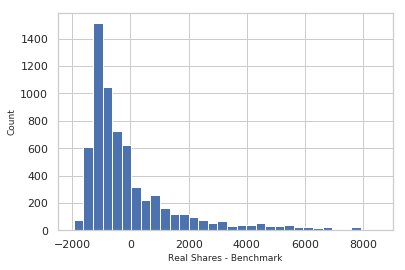

In [25]:
benchmark = np.repeat(np.exp((y_train1)).mean(), len(y_test1))
print('Benchmark performance:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ori, benchmark))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ori, benchmark))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ori, benchmark)))  

error_ben= y_test_ori - benchmark
print('--- Error ---')
print(error_ben.describe())
print('------')
print('Error in +- 200:',num_abs_small(error_ben,200))

error_ben

pl.figure()
pl.xlim((-2500, +9000))
pl.hist(error_ben, normed=False, bins=30)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Real Shares - Benchmark", fontsize = 9)
pl.show()
pl.close()

In [27]:
benchmark[1]

1986.065092410387

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Mean Absolute Error: 1007.4597651534283
Mean Squared Error: 2835279.3023642683
Root Mean Squared Error: 1683.8287627797158
--- Error ---
count    6480.000000
mean      394.379915
std      1637.118624
min     -2615.170312
25%      -532.642079
50%      -137.165395
75%       663.021728
max      8844.396114
Name: log_shares, dtype: float64
------
Error in +- 200: 1162


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


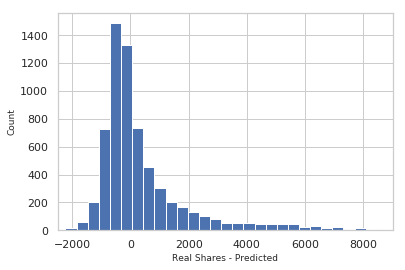

       Actual_logged  Predicted_logged
17456       6.287859          7.160114
3280        8.131531          7.659584
31881       7.003065          7.072329
27430       7.313220          7.706366
28919       8.188689          7.545696


       Actual    Predicted
17456   538.0  1287.058020
3280   3400.0  2120.875057
31881  1100.0  1178.889965
27430  1500.0  2222.450256
28919  3600.0  1892.580004


In [26]:
to_pre_log(lr,"lr",X_test1,y_test1)

# Residual plot ( to be continued

https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")
pl.show()
pl.close('All')

In [65]:
type(y_test_ori)

pandas.core.series.Series

# Plot the residuals after fitting a linear model
import seaborn as sns
sns.set(style="whitegrid")
sns.residplot(y_test_ori.values, benchmark, lowess=True, color="g")
pl.show()
pl.close('All')

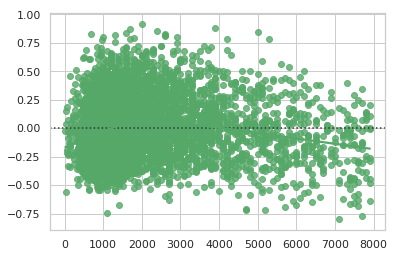

In [68]:

sns.residplot(y_test_ori.values, lr.predict(X_test1), lowess=True, color="g")
pl.show()
pl.close('All')

# Performance Evaluation
    https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html
    http://www.scikit-yb.org/en/latest/api/regressor/peplot.html
    Confidence Intervals vs Prediction Intervals vs Tolerance Intervals
    http://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/
    Prediction intervals [PI]
    http://statisticsbyjim.com/glossary/prediction-intervals/

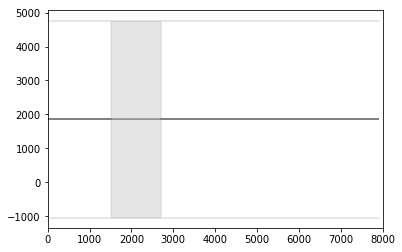

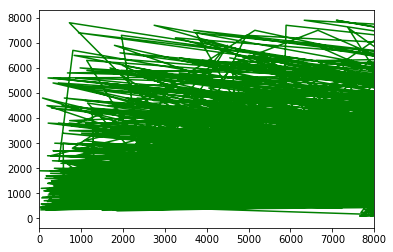

In [51]:
'''
from sklearn.metrics import mean_squared_error

#Mean Absolute Error:
#benchmark: mean
MSE_ben = mean_squared_error(y_test_ori, benchmark) #(y_real, y_pred)
dyfit = 2 * np.sqrt(MSE_ben)  # 2*sigma ~ 95% confidence region

# Visualize the result
#pl.plot(xdata, ydata, 'or')
pl.figure()
pl.plot(y_test_ori, benchmark, '-', color='gray')
pl.fill_between(y_test_ori, benchmark - dyfit, benchmark + dyfit,
                 color='gray', alpha=0.2)
pl.xlim(0, 8000)
pl.show()

pl.figure()
pl.plot(y_test_ori, color='green')
pl.xlim(0, 8000)
pl.show()

pl.close('All')



line,caps,bars=plt.errorbar(
    [1,2,3,4],     # X
    [1,4,9,16],    # Y
    yerr=5,        # Y-errors
    fmt="rs--",    # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    ecolor='k',    # color of error bar
    capsize=5,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar
    )

plt.setp(line,label="My error bars")#give label to returned line
plt.legend(numpoints=1,             #Set the number of markers in label
           loc=('upper left'))      #Set label location
plt.xlim((0.5,4.5))                 #Set X-axis limits
plt.xticks([1,2,3,4])               #get only ticks we want
plt.yticks([0,5,10,15,20])
plt.show()

'''


'''
#to predict by model built

def to_pre_ori(learner,name_learner,X_test,y_testset):
#ex: to_pre(ADA_regr,"ADA",X_test,y_test)
    y_pred_original = learner.predict(X_test) 
    y_test_original = y_testset
    
    from sklearn import metrics  
    print('learner:',learner)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_original, y_pred_original))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test_original, y_pred_original))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_original, y_pred_original)))  
    print('\n')
    df_pred_real = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})  
    print(df_pred_real.head())
    
    #draw for norm
    pl.figure() #figsize = (13,5)
    y_test_original.plot(kind='hist', bins=100, color="gold")
    pl.title("y_test_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_"+name_learner+".pdf")
    
    pd.Series(y_pred_original).plot(kind='hist', bins=100, color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_"+name_learner+".pdf")
    pl.close('all')
    
    
    return '''


# Predicting and Evaluating

In [22]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# Built model for normal

regressor = LinearRegression()  
regressor.fit(X_train1, y_train1)  

DT_regr_1 = DecisionTreeRegressor(max_depth=2)
DT_regr_2 = DecisionTreeRegressor(max_depth=5)
ADA_regr = AdaBoostRegressor()

DT_regr_1.fit(X_train1, y_train1)
DT_regr_2.fit(X_train1, y_train1)
ADA_regr.fit(X_train1, y_train1)

'''regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2)  

DT_regr_12 = DecisionTreeRegressor(max_depth=2)
DT_regr_22 = DecisionTreeRegressor(max_depth=5)
ADA_regr2 = AdaBoostRegressor()

DT_regr_12.fit(X_train2, y_train2)
DT_regr_22.fit(X_train2, y_train2)
ADA_regr2.fit(X_train2, y_train2)
'''


'regressor2 = LinearRegression()  \nregressor2.fit(X_train2, y_train2)  \n\nDT_regr_12 = DecisionTreeRegressor(max_depth=2)\nDT_regr_22 = DecisionTreeRegressor(max_depth=5)\nADA_regr2 = AdaBoostRegressor()\n\nDT_regr_12.fit(X_train2, y_train2)\nDT_regr_22.fit(X_train2, y_train2)\nADA_regr2.fit(X_train2, y_train2)\n'

In [23]:
y_test1.describe()

count    6365.000000
mean        7.277895
std         0.679186
min         3.091042
25%         6.812345
50%         7.170120
75%         7.696213
max         8.974618
Name: log_shares, dtype: float64

In [24]:
np.exp(y_test1).describe()

count    6365.000000
mean     1842.663786
std      1456.006473
min        22.000000
25%       909.000000
50%      1300.000000
75%      2200.000000
max      7900.000000
Name: log_shares, dtype: float64

In [25]:
to_pre_log(ADA_regr,"ADA",X_test1,y_test1)

learner: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
Mean Absolute Error: 915.7718883098971
Mean Squared Error: 2144650.749977483
Root Mean Squared Error: 1464.4626147421732


       Actual_logged  Predicted_logged
4211        7.313220          7.067693
1567        6.475433          7.434839
33248       7.740664          7.463002
13611       6.263398          6.903895
6688        6.461468          7.370641


       Actual    Predicted
4211   1500.0  1173.437891
1567    649.0  1693.985632
33248  2300.0  1742.371341
13611   525.0   996.146765
6688    640.0  1588.651442


In [26]:
to_pre_log(DT_regr_1,"DT1",X_test1,y_test1)

learner: DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 926.8952468797089
Mean Squared Error: 2154212.5934682842
Root Mean Squared Error: 1467.7236093584802


       Actual_logged  Predicted_logged
4211        7.313220          7.086934
1567        6.475433          7.086934
33248       7.740664          7.483619
13611       6.263398          7.086934
6688        6.461468          7.353863


       Actual    Predicted
4211   1500.0  1196.235096
1567    649.0  1196.235096
33248  2300.0  1778.665601
13611   525.0  1196.235096
6688    640.0  1562.219761


In [27]:
to_pre_log(DT_regr_2,"DT2",X_test1,y_test1)

learner: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 900.483267164003
Mean Squared Error: 2061232.996571036
Root Mean Squared Error: 1435.6994798950914


       Actual_logged  Predicted_logged
4211        7.313220          7.374444
1567        6.475433          7.581074
33248       7.740664          7.502497
13611       6.263398          6.981048
6688        6.461468          7.132998


       Actual    Predicted
4211   1500.0  1594.704930
1567    649.0  1960.733870
33248  2300.0  1812.563232
13611   525.0  1076.045961
6688    640.0  1252.626600


In [28]:
to_pre_log(regressor,"Reg",X_test1,y_test1)

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error: 888.6729100813731
Mean Squared Error: 2038717.6037265267
Root Mean Squared Error: 1427.8366866440037


       Actual_logged  Predicted_logged
4211        7.313220          6.999625
1567        6.475433          7.281178
33248       7.740664          7.416761
13611       6.263398          6.807479
6688        6.461468          7.375617


       Actual    Predicted
4211   1500.0  1096.222224
1567    649.0  1452.698985
33248  2300.0  1663.636916
13611   525.0   904.587379
6688    640.0  1596.576658


## Original (worse performance compared to logged method)
thses are results from a dataset of 

    df=df[df[' shares']<6000]
    df=df[df[' shares']>100]
    df.describe()
    
    x_pre = df.drop([' weekday_is_saturday', ' weekday_is_sunday',' weekday_is_monday',' weekday_is_tuesday', 
                 ' weekday_is_wednesday', ' weekday_is_thursday', ' n_non_stop_words','log_shares',' n_unique_tokens',
                            ' n_non_stop_words',' kw_avg_min',' kw_max_min',' kw_min_min',
                            ' shares',' self_reference_min_shares',' self_reference_avg_sharess'],1)"


In [181]:
to_pre_ori(ADA_regr2,"ADA2",X_test2,y_test2)

learner: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
Mean Absolute Error: 1029.0322659725546
Mean Squared Error: 1451657.1134748864
Root Mean Squared Error: 1204.8473403194641


       Actual    Predicted
5972     2400  1906.073484
24293    1400  1800.801909
26087     714  2268.600816
10549    4100  2483.346328
37475    1600  2268.600816


In [183]:
to_pre_ori(DT_regr_12,"DT12",X_test2,y_test2)

learner: DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 866.5597268563199
Mean Squared Error: 1307213.453120767
Root Mean Squared Error: 1143.3343575353479


       Actual    Predicted
5972     2400  1447.288480
24293    1400  1447.288480
26087     714  2025.745946
10549    4100  2025.745946
37475    1600  2025.745946


In [185]:
to_pre_ori(DT_regr_22,'DT22',X_test2,y_test2)

learner: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 834.9531437024234
Mean Squared Error: 1253558.6035511913
Root Mean Squared Error: 1119.6243135762957


       Actual    Predicted
5972     2400  1597.383992
24293    1400  1298.695351
26087     714  1860.026667
10549    4100  1860.026667
37475    1600  1860.026667


In [187]:
to_pre_ori(regressor2,"Reg2",X_test2,y_test2)

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error: 823.3636418152861
Mean Squared Error: 1230366.9910378463
Root Mean Squared Error: 1109.2190906389262


       Actual    Predicted
5972     2400  1591.632814
24293    1400  1183.874375
26087     714  1747.675163
10549    4100  2254.780637
37475    1600  1707.368869
